## Lab 9
Extraction de primitives

In [5]:
import skimage
import skimage.feature
import numpy as np
import matplotlib.pyplot as plt
import imageio as io

plt.rcParams['figure.figsize'] = (20, 10)

## Exercice 1 - Feature matching
Identifier un patch dans `img1` et l'associer à `img2` en utilisant la somme des différences carrées (SSD).

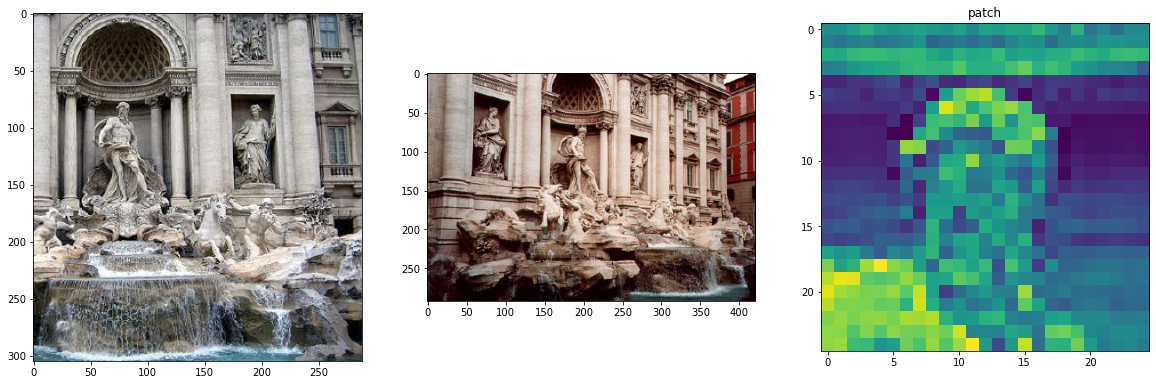

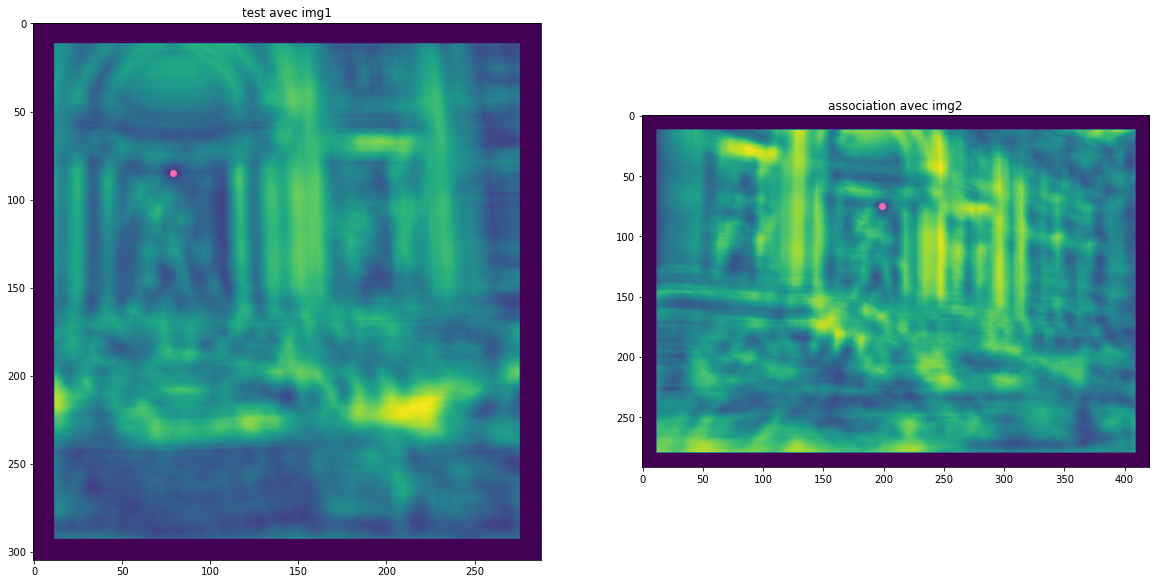

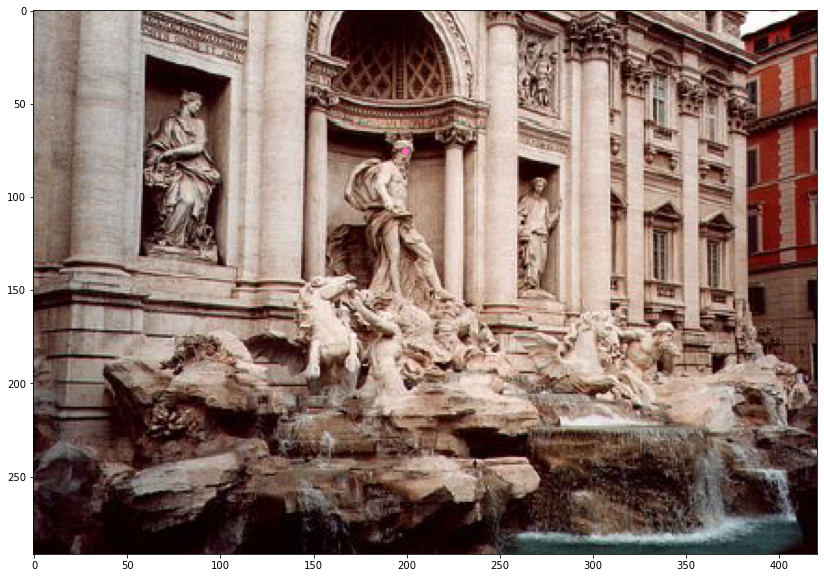

In [2]:
img1 = io.imread('statue1.PNG')
img2 = io.imread('statue2.PNG')

plt.subplot(131); plt.imshow(img1)
plt.subplot(132); plt.imshow(img2)

y = 73; x = 67
patch = img1[y:y+25, x:x+25].mean(axis=2)
r = patch.shape[0] // 2
plt.subplot(133); plt.imshow(patch); plt.title('patch')

plt.show()

def ssd(img, patch):
    m_diff = np.ones_like(img)
    r = patch.shape[0] // 2
    
    for y in range(r, img.shape[0] - r):
        for x in range(r, img.shape[1] - r):
            diff = (img[y-r:y+r+1, x-r:x+r+1] - patch) ** 2
            m_diff[y, x] = diff.sum()
    
    return m_diff

test = ssd(img1.mean(axis=2), patch)
plt.subplot(121); plt.imshow(test)
lines, columns = np.where(test == test[r:-r,r:-r].min())
plt.scatter(columns, lines, color = 'hotpink')
plt.title('test avec img1')

asso = ssd(img2.mean(axis=2), patch)
plt.subplot(122); plt.imshow(asso)
lines, columns = np.where(asso == asso[r:-r,r:-r].min())
plt.scatter(columns, lines, color = 'hotpink')
plt.title('association avec img2')

plt.show()

plt.imshow(img2)
plt.scatter(columns, lines, color = 'hotpink')
plt.show()

## Exercice 2
Essayer de détecter des coins/caractéristiques intéressant avec la méthode Harris.  
Utiliser `skimage.feature.corner_harris` pour obtenir la réponse au coin et `skimage.feature.corner_peaks` avec `threshold_rel` autour de 0.001 pour identifier le pixel au centre du coin.

(512, 512) 63 207
(512, 512) -0.5025452245700637 2.1881876429928067


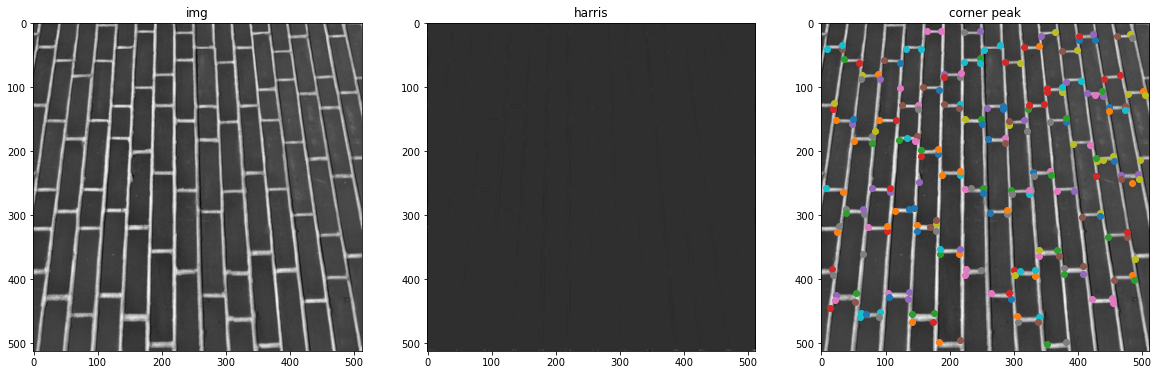

In [6]:
img = skimage.data.brick()
print(img.shape, img.min(), img.max())

plt.subplot(131); plt.imshow(img, cmap="gray"); plt.title('img')

harris = skimage.feature.corner_harris(img)
print(harris.shape, harris.min(), harris.max())
plt.subplot(132); plt.imshow(harris, cmap="gray"); plt.title('harris')

coords = skimage.feature.corner_peaks(harris, min_distance=5, threshold_rel=0.001)#feature.peak_local_max(img, labels=thresh, min_distance=3)

plt.subplot(133); plt.imshow(img, cmap="gray"); plt.title('corner peak')
for line, column in coords:
    plt.scatter(column, line)

plt.show()